In [1]:
pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 14.5 MB/s eta 0:00:00


In [3]:
pip install torch torchvision torchaudio

In [4]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [6]:
reader_gpu = easyocr.Reader(['en'], gpu=True)
reader_cpu = easyocr.Reader(['en'], gpu=False)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

In [14]:
IMAGE_PATH="/content/hi.png"
image = cv2.imread(IMAGE_PATH)
results_gpu = reader_gpu.readtext(image)
results = sorted(results_gpu, key=lambda r: r[0][0][1])
sorted_results = sorted(results, key=lambda r: (r[0][0][0], r[0][0][1]))
ordered_text = ' '.join([result[1] for result in sorted_results])
print(ordered_text)

Whatsup? Hello . Hey?


In [15]:
print(ordered_text.upper())

WHATSUP? HELLO . HEY?


In [16]:
import time # import the time module
def calculate_fps(model, image, iterations=10):
    start_time = time.time()
    for _ in range(iterations):
        model.readtext(image)
    end_time = time.time()
    total_time = end_time - start_time
    fps = iterations / total_time
    return fps
fps_gpu = calculate_fps(reader_gpu, image)
fps_cpu = calculate_fps(reader_cpu, image)
print(f"FPS on GPU: {fps_gpu:.2f}")
print(f"FPS on CPU: {fps_cpu:.2f}")

FPS on GPU: 0.76
FPS on CPU: 0.95


In [18]:
import tensorflow as tf
import torch
device = torch.device('cpu')
reader = easyocr.Reader(['en'], gpu=False)
image_path = '/content/hi.png'
results_cpu = reader.readtext(image_path)
results = sorted(results_cpu, key=lambda r: r[0][0][1])
sorted_results = sorted(results_cpu, key=lambda r: (r[0][0][0], r[0][0][1]))
ordered_text_new = ' '.join([result[1] for result in sorted_results])
print(ordered_text_new)

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

Whatsup? Hello . Hey?


In [20]:
import time
start_time = time.time()
results_cpu = reader_cpu.readtext(image)
cpu_time = time.time() - start_time
start_time = time.time()
results_gpu = reader_gpu.readtext(image)
gpu_time = time.time() - start_time
print(f"Time taken by CPU model(Speed): {cpu_time:.4f} seconds")
print(f"Time taken by GPU model(Speed): {gpu_time:.4f} seconds")

Time taken by CPU model(Speed): 1.1049 seconds
Time taken by GPU model(Speed): 1.5681 seconds


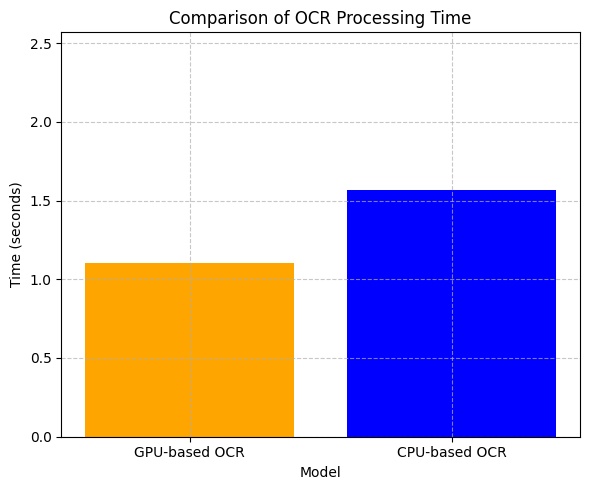

In [25]:
import matplotlib.pyplot as plt
models = ['GPU-based OCR', 'CPU-based OCR']
times = [cpu_time, gpu_time]
plt.figure(figsize=(6, 5))
plt.bar(models, times, color=['orange', 'blue'])
plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.title('Comparison of OCR Processing Time')
plt.ylim(0, max(times) + 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
ground_truth = "HI THERE, HOW ARE YOU?"
results_cpu = reader.readtext(image_path)
results = sorted(results_cpu, key=lambda r: r[0][0][1])
sorted_results = sorted(results_cpu, key=lambda r: (r[0][0][0], r[0][0][1]))
ordered_text_new = ' '.join([result[1] for result in sorted_results])
extracted_text=ordered_text_new.upper()
accuracy = sum(1 for a, b in zip(extracted_text, ground_truth) if a == b) / len(ground_truth)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 4.55%


In [24]:
device = 'gpu' if torch.cuda.is_available() else 'cpu'
reader = easyocr.Reader(['en'], gpu=(device == 'gpu'))
image_path = '/content/hi.png'
num_reps = 10
start_time = time.time()
for _ in range(num_reps):
    reader.readtext(image_path)
end_time = time.time()
fps = num_reps / (end_time - start_time)
print(f"FPS on {device.upper()}: {fps:.2f}")

FPS on CPU: 0.84
